<a href="https://colab.research.google.com/github/krittikaroy2006/IEDC-project-/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
(569, 30)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   


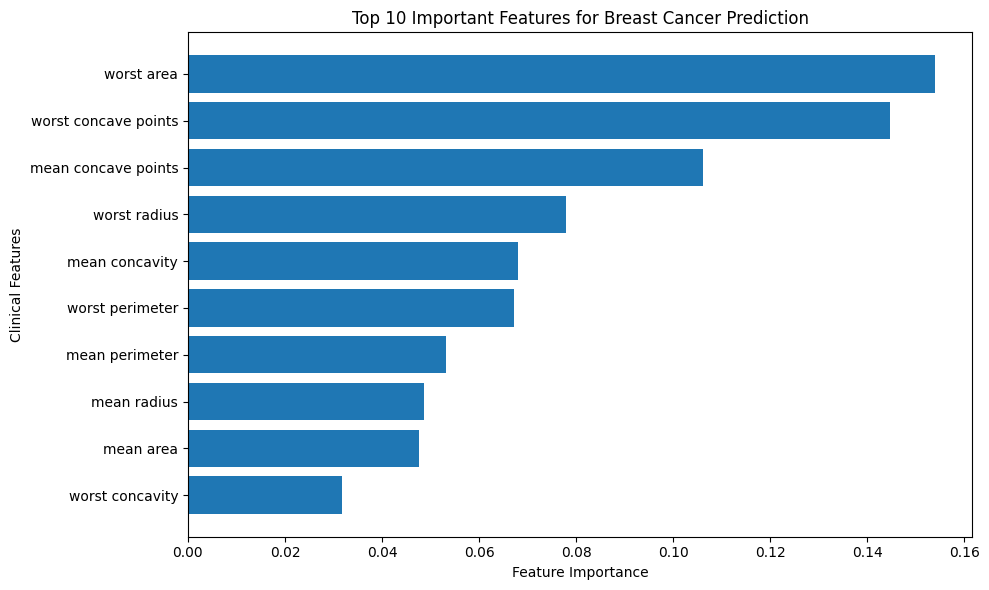

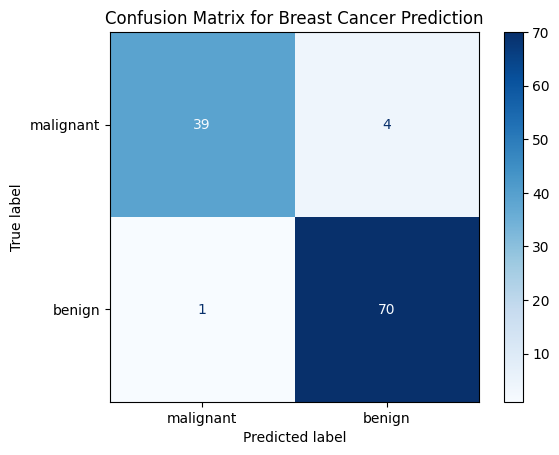

Logistic Regression Accuracy: 0.956140350877193
Random Forest Accuracy: 0.9649122807017544
Malignant Patient Prediction: Malignant (Cancer)
Benign Patient Prediction: Benign (No Cancer)


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = load_breast_cancer()

print(data.keys())
print(data.feature_names)
print(data.target_names)
print(data.data.shape)

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]

top_features = feature_names[indices][:10]
top_importances = importances[indices][:10]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Clinical Features")
plt.title("Top 10 Important Features for Breast Cancer Prediction")
plt.yticks(fontsize=10)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Breast Cancer Prediction")
plt.show()

rf_pred = rf_model.predict(X_test)

logistic_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

malignant_index = y_test[y_test == 0].index[0]
malignant_patient = X_test.loc[[malignant_index]]
malignant_pred = model.predict(malignant_patient)

benign_index = y_test[y_test == 1].index[0]
benign_patient = X_test.loc[[benign_index]]
benign_pred = model.predict(benign_patient)

print("Malignant Patient Prediction:",
      "Malignant (Cancer)" if malignant_pred[0] == 0 else "Benign (No Cancer)")

print("Benign Patient Prediction:",
      "Benign (No Cancer)" if benign_pred[0] == 1 else "Malignant (Cancer)")


Found 979 files belonging to 2 classes.
Using 784 files for training.
Found 979 files belonging to 2 classes.
Using 195 files for validation.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - accuracy: 0.7916 - loss: 0.4786 - val_accuracy: 0.7795 - val_loss: 0.3559
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8492 - loss: 0.3352 - val_accuracy: 0.8410 - val_loss: 0.4008
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8187 - loss: 0.4371 - val_accuracy: 0.8462 - val_loss: 0.3115
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8532 - loss: 0.2999 - val_accuracy: 0.8308 - val_loss: 0.3195
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8752 - loss: 0.2741 - val_accuracy: 0.8667 - val_loss: 0.2954


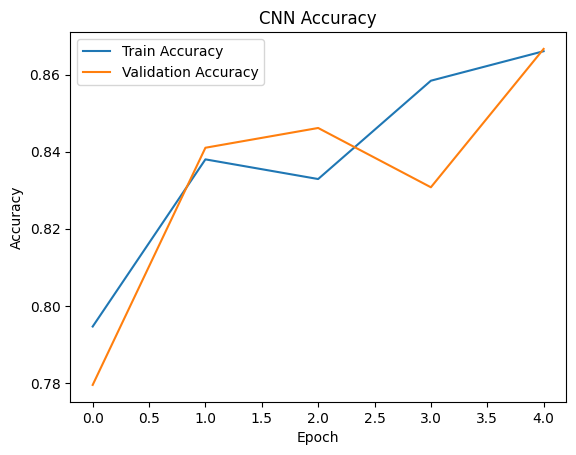

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
CNN Prediction: Cancer


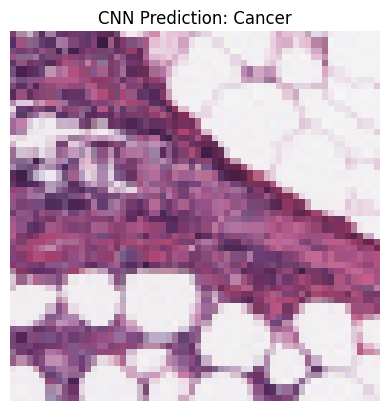

Project completed successfully.
Models used: Logistic Regression, Random Forest, CNN


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Image settings
img_size = (64, 64)
batch_size = 16

# Load images from folder
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# Normalize images
normalization = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization(x), y))
val_data = val_data.map(lambda x, y: (normalization(x), y))

# CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train CNN
history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Accuracy")
plt.show()

img_path = os.path.join("dataset/cancer", os.listdir("dataset/cancer")[0])

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = cnn_model.predict(img_array)

plt.imshow(img)
plt.axis("off")

if prediction[0][0] > 0.5:
    plt.title("CNN Prediction: Cancer")
    print("CNN Prediction: Cancer")
else:
    plt.title("CNN Prediction: Non-Cancer")
    print("CNN Prediction: Non-Cancer")

plt.show()
print("Project completed successfully.")
print("Models used: Logistic Regression, Random Forest, CNN")

